## Dataset-1_Sparkling Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import plotly.offline as py
import sklearn
import statsmodels
from pylab import rcParams

In [3]:
df = pd.read_csv("Sparkling.csv")
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [4]:
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [3]:
df.shape

(187, 2)

In [4]:
df.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [5]:
df = pd.read_csv("Sparkling.csv", parse_dates=True, index_col='YearMonth')
df.dtypes

Sparkling    int64
dtype: object

In [6]:
#to check the date range
df.tail(5)

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


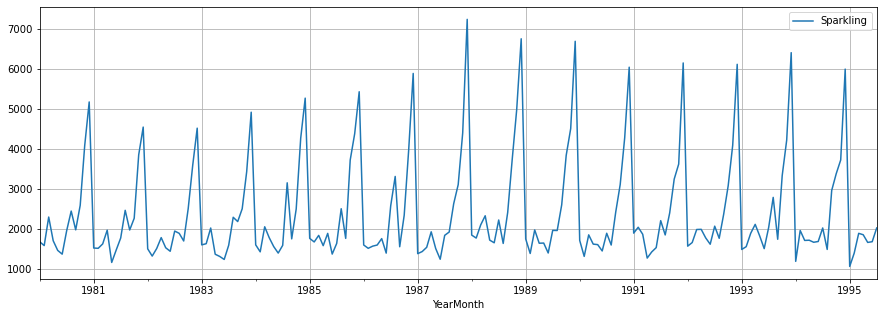

In [7]:
rcParams['figure.figsize'] = 15,5
df.plot(grid=True);

In [8]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


### Box Plots

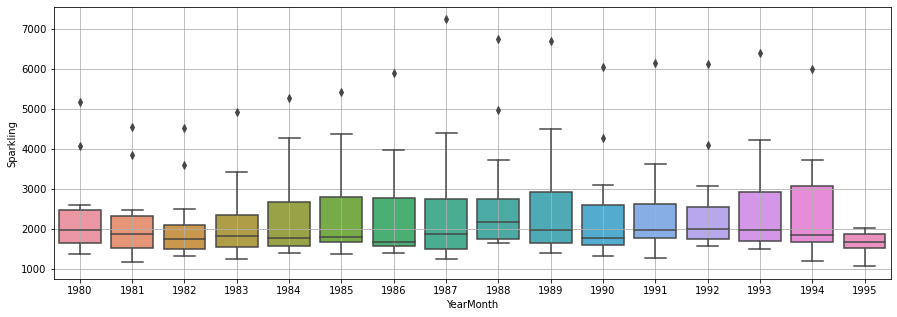

In [9]:
#Yearly Boxplot

sns.boxplot(x=df.index.year, y=df['Sparkling'])
plt.grid();

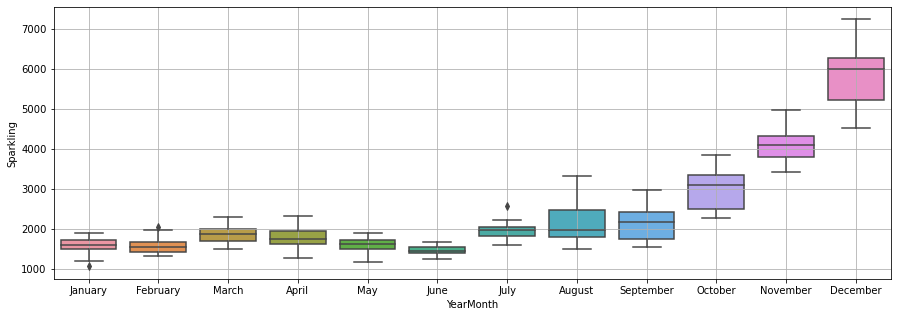

In [10]:
#Month wise Plot
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

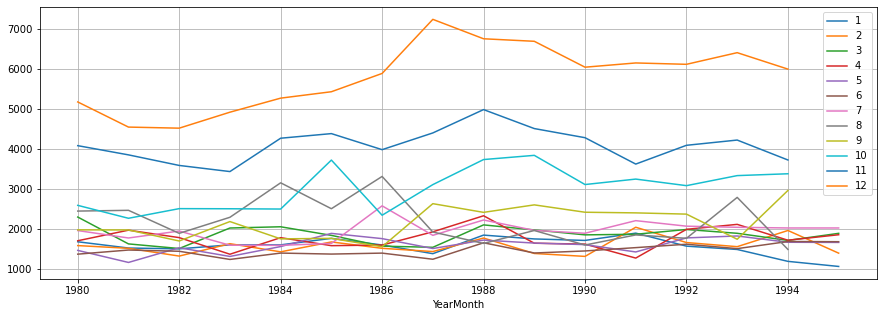

In [11]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

In [12]:
#decompe the data

from statsmodels.tsa.seasonal import seasonal_decompose

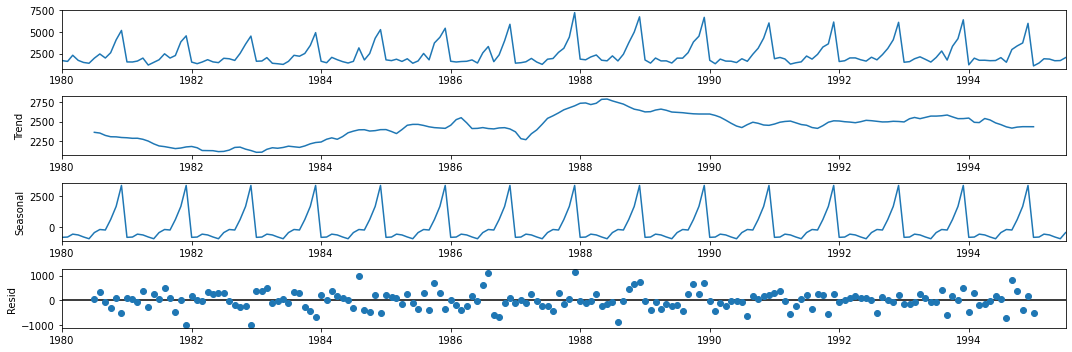

In [13]:
#decomposition_additive model

decomposition = seasonal_decompose(df, model='additive', period=None)
decomposition.plot();

In [14]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


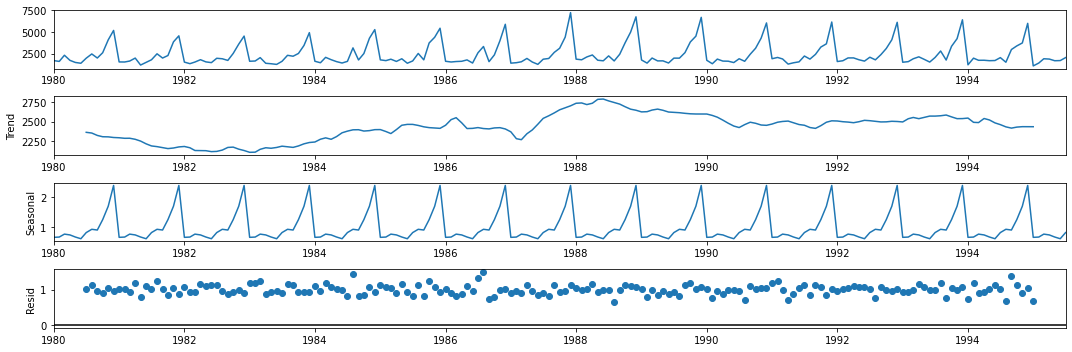

In [15]:
#decomposition_multiplicative model

decomposition = seasonal_decompose(df,model='multiplicative', period=None)
decomposition.plot();

Both of the models seems similar, hence we can go with additve model.

In [16]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

### Split the data to train and test

In [20]:
df.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='YearMonth')

Note: Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [21]:
train = df[df.index<='1991'] 
test = df[df.index>'1991']

In [22]:
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of Training Data


,Sparkling
YearMonth,
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047
1991-01-01,1902


First few rows of Test Data


,Sparkling
YearMonth,
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432
1991-06-01,1540


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [23]:
print(train.shape)
print(test.shape)

(133, 1)
(54, 1)


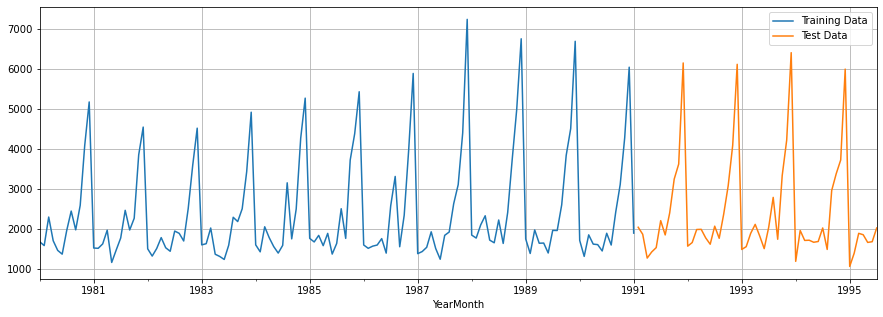

In [24]:
train['Sparkling'].plot(fontsize=10)
test['Sparkling'].plot(fontsize=10)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Building different models and comparing the accuracy metrics

### Model 1: Linear Regression

In [25]:
[i+1 for i in range(len(train))]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133]

In [26]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+134 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133]
Test Time instance 
 [134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [27]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [28]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132
1991-01-01       1902   133 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137
1991-06-01       1540   138 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

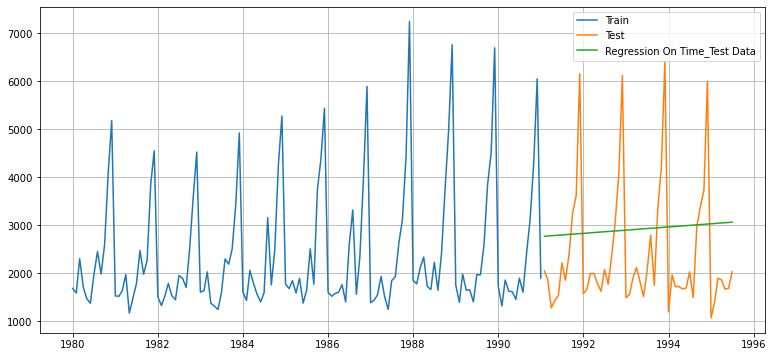

In [31]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [32]:
#Model Evaluation

#Test Data - RMSE

from sklearn import metrics
from sklearn.metrics import  mean_squared_error  
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1383.347


In [33]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1383.347145


### Model 2: Naive Approach

In [34]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [35]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-02-01    1902
1991-03-01    1902
1991-04-01    1902
1991-05-01    1902
1991-06-01    1902
Name: naive, dtype: int64

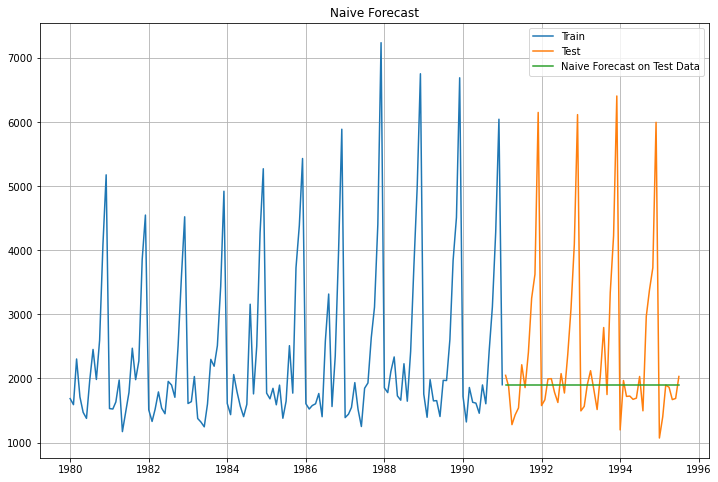

In [36]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')

plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [37]:
# Model Evaluation

## Test Data - RMSE
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1381.177


In [38]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf_2

,Test RMSE
NaiveModel,1381.177135


In [39]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1383.347145
NaiveModel,1381.177135


### Method 3: Simple Average

In [40]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [41]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-02-01,2049,2400.007519
1991-03-01,1874,2400.007519
1991-04-01,1279,2400.007519
1991-05-01,1432,2400.007519
1991-06-01,1540,2400.007519


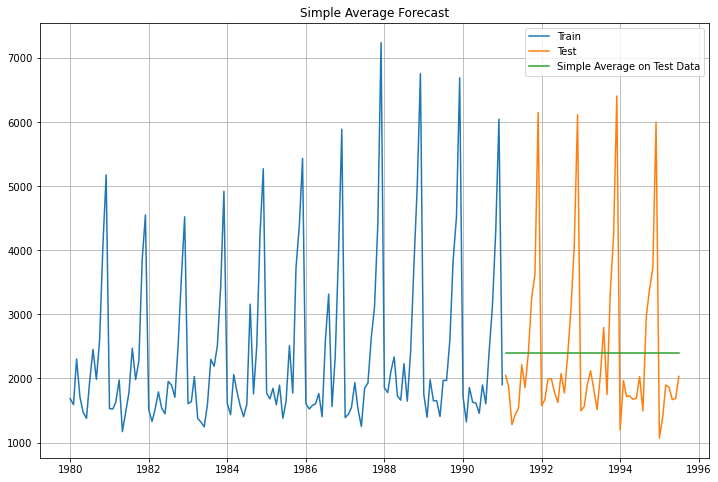

In [42]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [43]:
#Model Evaluation

## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1285.040


In [44]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1383.347145
NaiveModel,1381.177135
SimpleAverageModel,1285.039964


### Method 4: Moving Average(MA)

In [45]:
MovingAverage = df.copy()
MovingAverage['Sparkling'].rolling(2).mean()

YearMonth
1980-01-01       NaN
1980-02-01    1638.5
1980-03-01    1947.5
1980-04-01    2008.0
1980-05-01    1591.5
               ...  
1995-03-01    1649.5
1995-04-01    1879.5
1995-05-01    1766.0
1995-06-01    1679.0
1995-07-01    1859.5
Name: Sparkling, Length: 187, dtype: float64

In [46]:
#Trailing Moving Average

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_3'] = MovingAverage['Sparkling'].rolling(3).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage.head()

,Sparkling,Trailing_2,Trailing_3,Trailing_4
YearMonth,,,,
1980-01-01,1686,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN
1980-03-01,2304,1947.5,1860.333333,NaN
1980-04-01,1712,2008.0,1869.000000,1823.25
1980-05-01,1471,1591.5,1829.000000,1769.50


In [47]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<='1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>'1991']

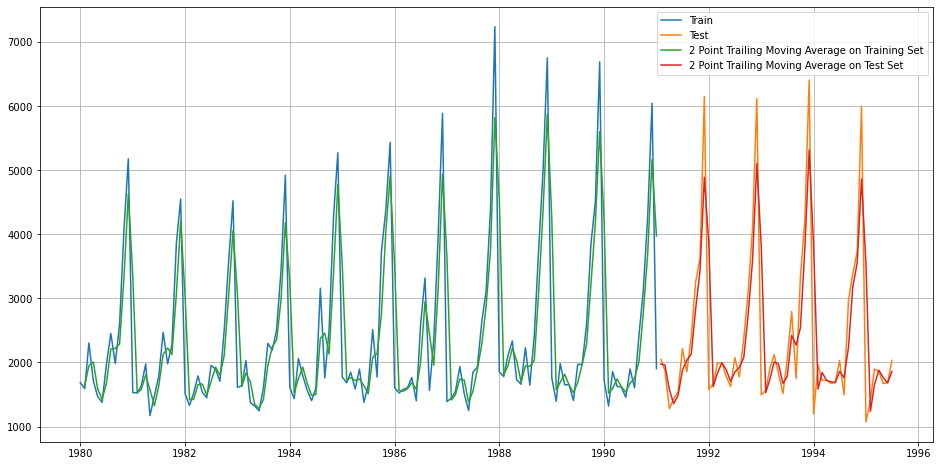

In [48]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [49]:
#Model Evaluation

## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_3 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_3'],squared=False)
print("For 3 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_3))

## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 770.929
For 3 point Moving Average Model forecast on the Training Data,  RMSE is 994.943
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1137.137


In [50]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, rmse_model4_test_3, rmse_model4_test_4]}
                           ,index=['2pt Trailing Moving Average', '3pt Trailing Moving Average', '4pt Trailing Moving Average'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1383.347145
NaiveModel,1381.177135
SimpleAverageModel,1285.039964
2pt Trailing Moving Average,770.928742
3pt Trailing Moving Average,994.942883
4pt Trailing Moving Average,1137.137053


### Method 5: Simple Exponential Smoothing

In [51]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tools.eval_measures as em

In [52]:
# create class
model_SES = SimpleExpSmoothing(train)
model_SES_autofit = model_SES.fit(optimized=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning:

invalid value encountered in greater_equal



In [53]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2399.997431502903,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Smoothening level is 0

In [54]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict.head()

1991-02-01    2399.997432
1991-03-01    2399.997432
1991-04-01    2399.997432
1991-05-01    2399.997432
1991-06-01    2399.997432
Freq: MS, dtype: float64

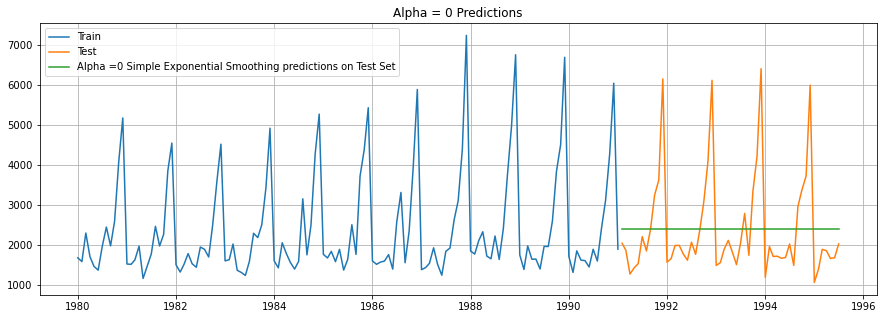

In [55]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0 Predictions');

In [56]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [57]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1285.0400290431987
SES RMSE (calculated using statsmodels): 1285.0400290431987


In [58]:
resultsDf5 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0,Simple Exponential Smoothening'])

resultsDf = pd.concat([resultsDf, resultsDf5])
resultsDf

,Test RMSE
RegressionOnTime,1383.347145
NaiveModel,1381.177135
SimpleAverageModel,1285.039964
2pt Trailing Moving Average,770.928742
3pt Trailing Moving Average,994.942883
4pt Trailing Moving Average,1137.137053
"Alpha=0,Simple Exponential Smoothening",1285.040029


### Method 6: Double Exponential Smoothing (Holt's Model)

In [59]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train)
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5312609347526807, 'smoothing_slope': 0.0, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 1686.1177360404427, 'initial_slope': 12.059505898093581, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning:

invalid value encountered in greater_equal



In [60]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict.head()

1991-02-01    3309.795134
1991-03-01    3321.854639
1991-04-01    3333.914145
1991-05-01    3345.973651
1991-06-01    3358.033157
Freq: MS, dtype: float64

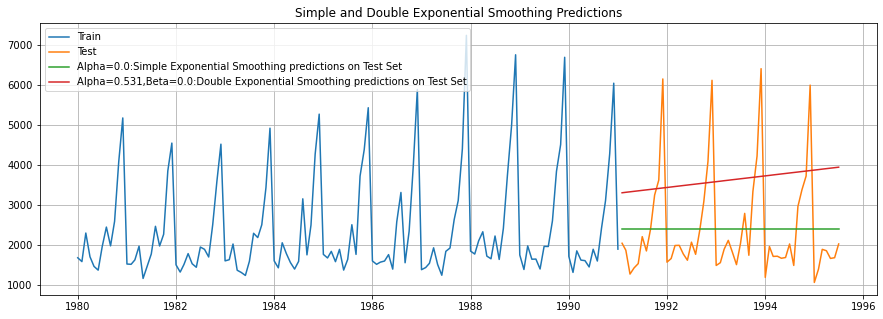

In [61]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.0:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.531,Beta=0.0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

double exponential smoothing is picking up the trend component along with the level component as well.

In [62]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 1780.0199599395382


In [63]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.531,Beta=0.0:Double Exponential Smoothening'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,1383.347145
NaiveModel,1381.177135
SimpleAverageModel,1285.039964
2pt Trailing Moving Average,770.928742
3pt Trailing Moving Average,994.942883
4pt Trailing Moving Average,1137.137053
"Alpha=0,Simple Exponential Smoothening",1285.040029
"Alpha=0.531,Beta=0.0:Double Exponential Smoothening",1780.019960


### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [64]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.




==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07677037593821708, 'smoothing_slope': 2.3688006102952196e-13, 'smoothing_seasonal': 0.4756118335101646, 'damping_slope': nan, 'initial_level': 1705.4584408725984, 'initial_slope': 0.41551476056092496, 'initial_seasons': array([  17.04718342,  -59.73038925,  446.45790474,  182.0333257 ,
       -163.4499421 , -180.78542817,  315.91538479,  833.96954114,
        380.4968455 ,  949.15150056, 2380.52321528, 3406.74852881]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning:

invalid value encountered in less_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning:

invalid value encountered in greater_equal



In [65]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict.head()

1991-02-01    1291.253430
1991-03-01    1774.702095
1991-04-01    1632.335687
1991-05-01    1540.296839
1991-06-01    1357.314358
Freq: MS, dtype: float64

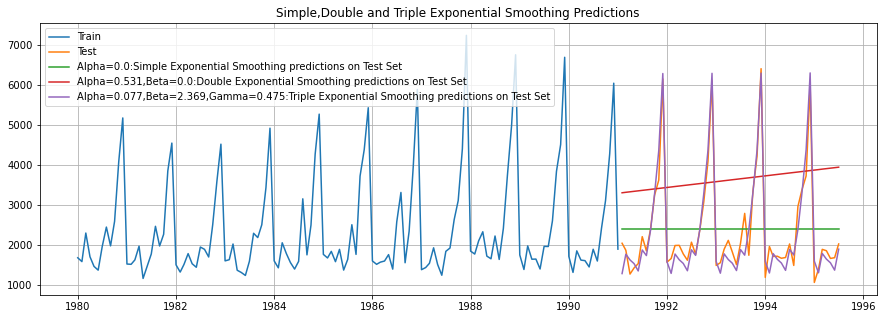

In [66]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.0:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.531,Beta=0.0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.077,Beta=2.369,Gamma=0.475:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

Triple Exponential Smoothing is picking up the seasonal component as well.

In [67]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 338.64828670046734


In [68]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.077,Beta=2.369,Gamma=0.475:Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,1383.347145
NaiveModel,1381.177135
SimpleAverageModel,1285.039964
2pt Trailing Moving Average,770.928742
3pt Trailing Moving Average,994.942883
4pt Trailing Moving Average,1137.137053
"Alpha=0,Simple Exponential Smoothening",1285.040029
"Alpha=0.531,Beta=0.0:Double Exponential Smoothening",1780.019960
"Alpha=0.077,Beta=2.369,Gamma=0.475:Triple Exponential Smoothing",338.648287


Inference: Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.
But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method with multiplicative seasonality

In [69]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='additive',seasonal='multiplicative')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning:

invalid value encountered in less_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning:

invalid value encountered in greater_equal




==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1471212577047071, 'smoothing_slope': 2.8640155929962824e-30, 'smoothing_seasonal': 0.36885208722046475, 'damping_slope': nan, 'initial_level': 1661.832400919583, 'initial_slope': 5.013324246853112, 'initial_seasons': array([0.99445792, 0.95485849, 1.22090909, 1.11469644, 0.92540668,
       0.92321941, 1.20396305, 1.51820236, 1.25201083, 1.60548263,
       2.44021833, 3.06581775]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [70]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am.head()

1991-02-01    1416.634498
1991-03-01    1860.823661
1991-04-01    1755.479564
1991-05-01    1648.553225
1991-06-01    1456.051394
Freq: MS, dtype: float64

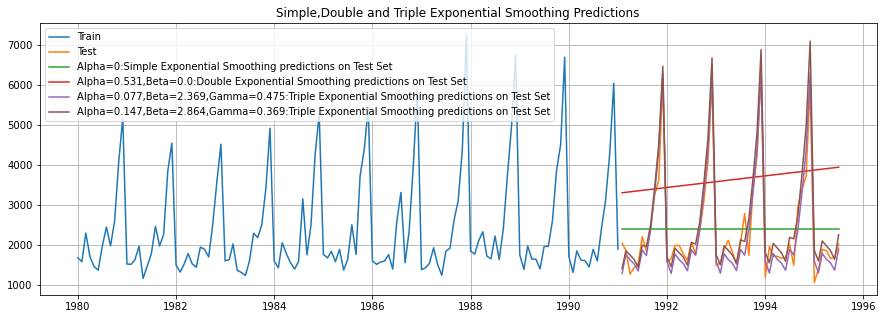

In [71]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.531,Beta=0.0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.077,Beta=2.369,Gamma=0.475:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.147,Beta=2.864,Gamma=0.369:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [72]:
#model accuracy

print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 427.9909996633647


In [73]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.147,Beta=2.864,Gamma=0.369:Triple Exponential Smoothening'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,1383.347145
NaiveModel,1381.177135
SimpleAverageModel,1285.039964
2pt Trailing Moving Average,770.928742
3pt Trailing Moving Average,994.942883
4pt Trailing Moving Average,1137.137053
"Alpha=0,Simple Exponential Smoothening",1285.040029
"Alpha=0.531,Beta=0.0:Double Exponential Smoothening",1780.019960
"Alpha=0.077,Beta=2.369,Gamma=0.475:Triple Exponential Smoothing",338.648287
"Alpha=0.147,Beta=2.864,Gamma=0.369:Triple Exponential Smoothening",427.991000


### Sorting the RMSE values in ascending order

In [74]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.077,Beta=2.369,Gamma=0.475:Triple Exponential Smoothing",338.648287
"Alpha=0.147,Beta=2.864,Gamma=0.369:Triple Exponential Smoothening",427.991000
2pt Trailing Moving Average,770.928742
3pt Trailing Moving Average,994.942883
4pt Trailing Moving Average,1137.137053
SimpleAverageModel,1285.039964
"Alpha=0,Simple Exponential Smoothening",1285.040029
NaiveModel,1381.177135
RegressionOnTime,1383.347145
"Alpha=0.531,Beta=0.0:Double Exponential Smoothening",1780.019960


For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing.

### Check for stationarity of the original Time Series data on which model will be built

In [75]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
      
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [76]:
test_stationarity(train['Sparkling'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.203905
p-value                          0.671913
#Lags Used                      12.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64 



We see that at 5% significant level the Time Series is non-stationary. Let us take a difference of order 1 and check whether the Time Series is stationary or not.

### Making the data stationary

In [77]:
#making the data stationary with difference of 1

test_stationarity(df['Sparkling'].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



We can see that now at  𝛼  = 0.05 the Time Series comes out to be stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

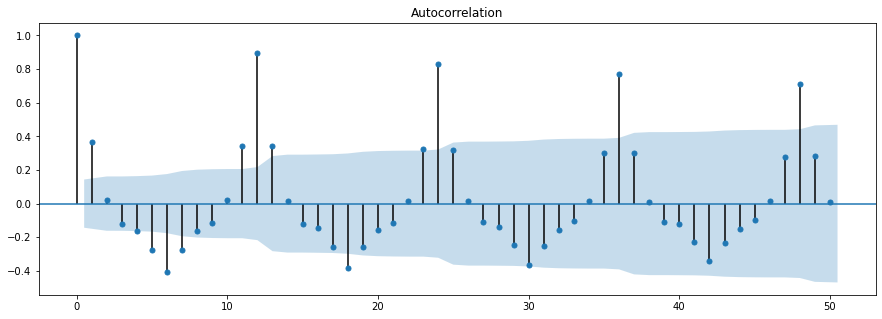

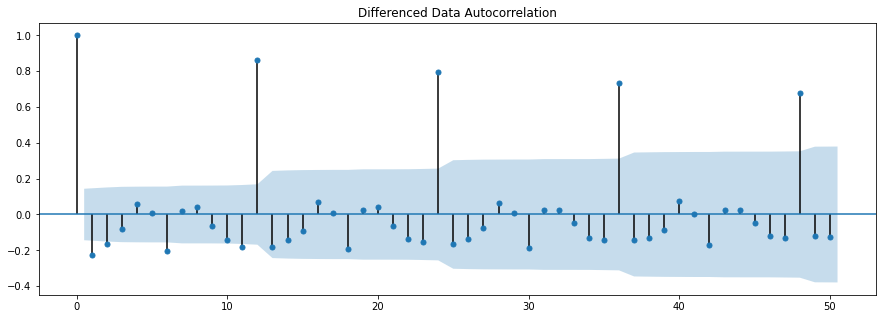

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning:

invalid value encountered in sqrt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning:

invalid value encountered in sqrt



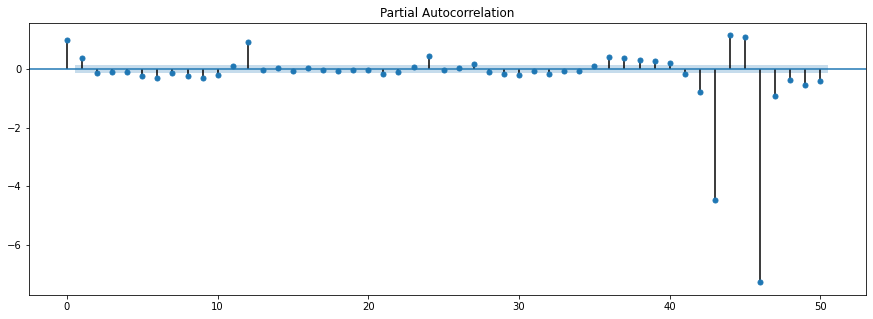

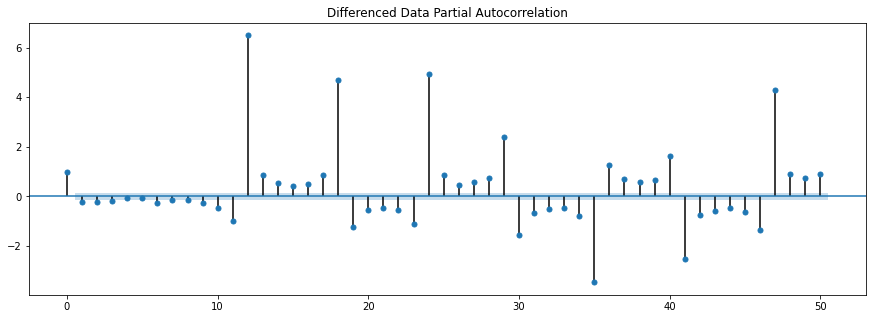

In [93]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### Building an Automated ARIMA model as per the lowest AIC

In [176]:
list(d)

[1]

In [177]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [178]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [179]:
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

In [180]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2294.7624515512757
ARIMA(0, 1, 1) - AIC:2286.847349211147
ARIMA(0, 1, 2) - AIC:2251.8357947406544
ARIMA(1, 1, 0) - AIC:2292.7129329854847
ARIMA(1, 1, 1) - AIC:2254.6195299263773
ARIMA(1, 1, 2) - AIC:2253.2594126231947
ARIMA(2, 1, 0) - AIC:2285.1641513835093
ARIMA(2, 1, 1) - AIC:2251.846509922078
ARIMA(2, 1, 2) - AIC:2231.215367969643


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



In [181]:
# Sort AIC values in ascending order for minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2231.215368
2,"(0, 1, 2)",2251.835795
7,"(2, 1, 1)",2251.846510
5,"(1, 1, 2)",2253.259413
4,"(1, 1, 1)",2254.619530
6,"(2, 1, 0)",2285.164151
1,"(0, 1, 1)",2286.847349
3,"(1, 1, 0)",2292.712933
0,"(0, 1, 0)",2294.762452


In [182]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2), freq=None)

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1109.608
Method:                       css-mle   S.D. of innovations           1028.150
Date:                Wed, 08 Sep 2021   AIC                           2231.215
Time:                        00:41:53   BIC                           2248.512
Sample:                    02-01-1980   HQIC                          2238.244
                         - 01-01-1991                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4044      0.537     10.071      0.000       4.353       6.456
ar.L1.D.Sparkling     1.2327      0.074     16.663      0.000       1.088       1.378
ar.L2.D.Sparkling    -0.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



### Evaluate the model and Predict on Test Set

In [183]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [184]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1453.6027982738885


In [185]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA_Auto(2,1,2)'])
resultsDf

,RMSE
"ARIMA_Auto(2,1,2)",1453.602798


### Building an Automated SARIMA model as per the lowest AIC

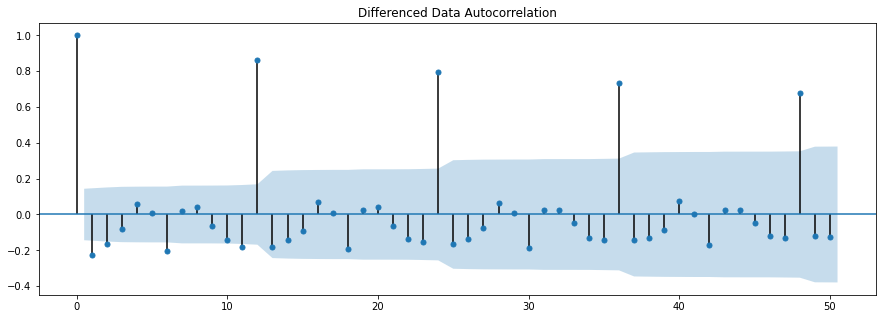

In [186]:
# Checking the ACF plot for the seasonal parameter for the SARIMA model

plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

#### Setting the seasonality as 6 for the first iteration of the auto SARIMA model

In [187]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [188]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [189]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2276.40438968189
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2177.258796857992
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1975.4080224238132
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2189.1670399625896
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2097.2453457503307
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1943.6309086935532
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1854.8097940366943
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1856.6066895205413
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1829.1959220069966
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2251.8815378150666
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2138.103778622589
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1933.4637650466998
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2157.6272689035422
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2022.1301672140366
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1870.4567469206688
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1813.127652415551
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1814.9381301223261
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1756.9933985199873
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AI

In [190]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 6)",1743.150358
80,"(2, 1, 2)","(2, 0, 2, 6)",1745.128784
53,"(1, 1, 2)","(2, 0, 2, 6)",1745.490712
17,"(0, 1, 1)","(2, 0, 2, 6)",1756.993399
44,"(1, 1, 1)","(2, 0, 2, 6)",1758.694765


In [191]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  133
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -864.575
Date:                           Wed, 08 Sep 2021   AIC                           1743.150
Time:                                   00:42:46   BIC                           1762.486
Sample:                                        0   HQIC                          1751.000
                                           - 133                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8066      0.103     -7.868      0.000      -1.008      -0.606
ma.L2         -0.0943      0.112     -0.844

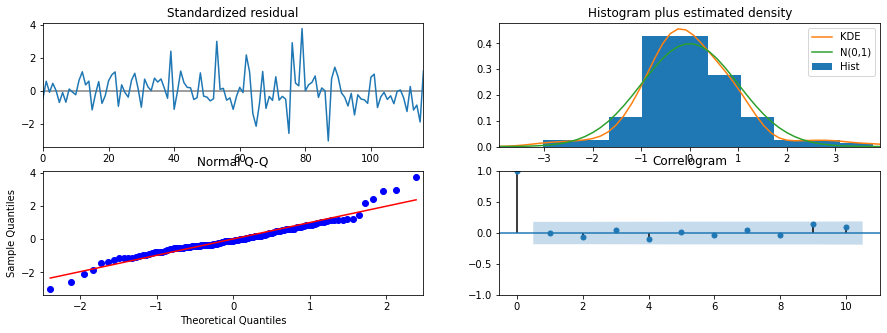

In [192]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

### Evaluate the model and Predict on Test Set

In [193]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [194]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1258.009562,385.083037,503.260679,2012.758445
1,1763.431091,392.214974,994.703867,2532.158315
2,1614.821807,394.065829,842.466975,2387.176639
3,1453.133529,395.908099,677.167913,2229.099145
4,1233.910428,397.741868,454.350691,2013.470166


In [195]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

494.1814105947278


In [196]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_Auto_Season6(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA_Auto(2,1,2)",1453.602798
"SARIMA_Auto_Season6(0,1,2)(2,0,2,6)",494.181411


#### SARIMA model with Seasonality parameter taken as 12

In [197]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [198]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2276.40438968189
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1975.45837290117
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1739.7947965976155
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1852.8662849692719
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1825.207274811366
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1648.980950493566
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1664.9749629752084


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1665.6962066394183
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1649.536328571516
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2251.8815378150666
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1939.3413222842662
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1705.6142469980607
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1811.6066853549394
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1753.293699293572
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1585.1477997435065
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1620.576623885293
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1614.3799086074348
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1585.4369716665938
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2206.53236740413
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1903.914034296611
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1672.5264407443983
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1804.3605304534995
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1739.5425927164663
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1572.211654407707
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1618.5112132292186
SARIMA(0, 1, 2)x(

In [199]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
131,"(1, 1, 2)","(1, 0, 2, 12)",1571.213605
134,"(1, 1, 2)","(2, 0, 2, 12)",1571.576262
104,"(0, 1, 2)","(1, 0, 2, 12)",1572.211654
107,"(0, 1, 2)","(2, 0, 2, 12)",1572.453083
158,"(2, 1, 2)","(1, 0, 2, 12)",1573.129787


In [200]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  133
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -778.607
Date:                            Wed, 08 Sep 2021   AIC                           1571.214
Time:                                    00:45:21   BIC                           1589.791
Sample:                                         0   HQIC                          1578.742
                                            - 133                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6297      0.264     -2.384      0.017      -1.147      -0.112
ma.L1         -0.1366      0.227   

### #Evaluate the model and Predict on Test Set

In [201]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [202]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1500.627381,388.920278,738.357644,2262.897118
1,1688.787390,399.420850,905.936908,2471.637871
2,1739.111543,399.447201,956.209414,2522.013672
3,1488.075689,403.109782,697.995034,2278.156344
4,1351.322543,403.358031,560.755330,2141.889756


In [203]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

455.84308499424696


In [204]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_Auto_Season12(1,1,2)(1,0,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA_Auto(2,1,2)",1453.602798
"SARIMA_Auto_Season6(0,1,2)(2,0,2,6)",494.181411
"SARIMA_Auto_Season12(1,1,2)(1,0,2,12)",455.843085


We can see that RMSE has reduced when we took seasonality parameter as 12

### Building Manual ARIMA model based on ACF and the PACF cutoffs

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning:

invalid value encountered in sqrt



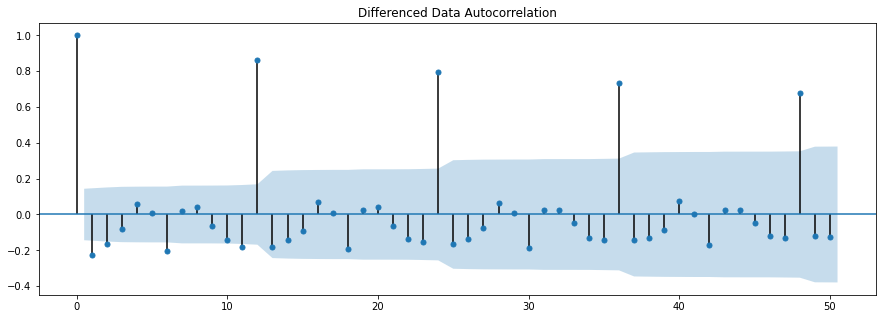

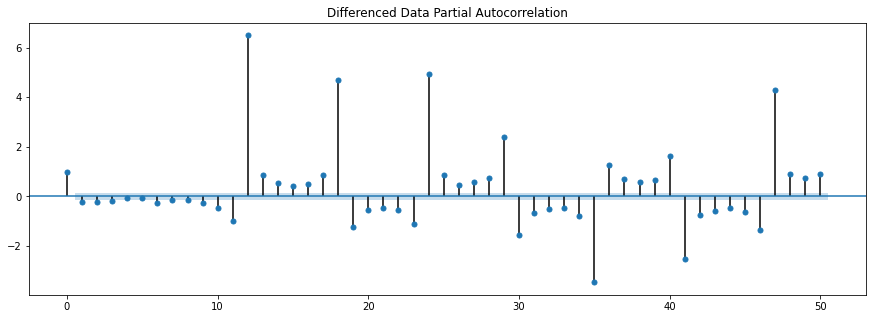

In [205]:
#ACF and PACF Plot for reference

plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

By looking at the above plots, we can say that

'p', the Auto-Regressive parameter in ARIMA model, has PACF plot cuts-off of 0.

'q', the Moving-Average parameter in ARIMA,has ACF plot cuts-off of 0.

'd' is already considered as 1

In [206]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(0,1,0),freq=None)

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1145.381
Method:                           css   S.D. of innovations           1419.687
Date:                Wed, 08 Sep 2021   AIC                           2294.762
Time:                        00:45:35   BIC                           2300.528
Sample:                    02-01-1980   HQIC                          2297.105
                         - 01-01-1991                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6364    123.568      0.013      0.989    -240.552     243.825


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



### Evaluate the model and prediction

In [207]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [208]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1365.1125069259529


In [209]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA_Manual(0,1,0)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA_Auto(2,1,2)",1453.602798
"SARIMA_Auto_Season6(0,1,2)(2,0,2,6)",494.181411
"SARIMA_Auto_Season12(1,1,2)(1,0,2,12)",455.843085
"ARIMA_Manual(0,1,0)",1365.112507


### Building Manual SARIMA model based on ACF and the PACF cutoffs

#### Taking Seasonality paramter as 6 and 12

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning:

invalid value encountered in sqrt



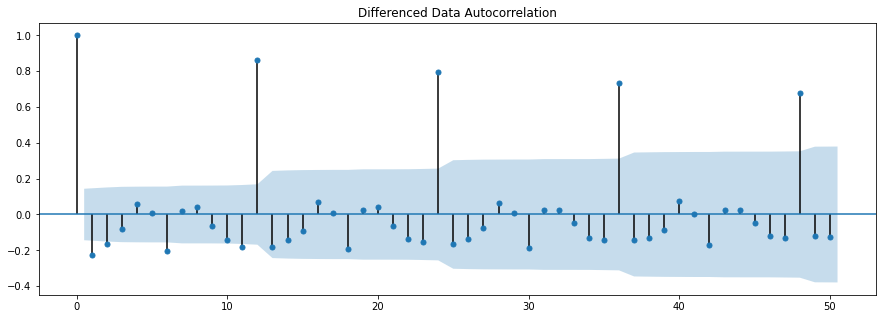

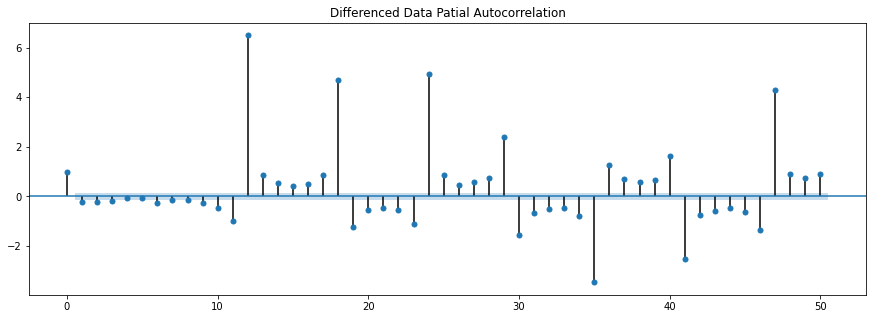

In [210]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

In [215]:
dftest=adfuller((df['Sparkling'].diff()).dropna())
output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
        output['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller Test for difference of 6:')        
print (output,'\n')

Results of Dickey-Fuller Test for difference of 6:
Test Statistic                -1.139372e+01
p-value                        7.952027e-21
#Lags Used                     6.000000e+00
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [216]:
dftest=adfuller((df['Sparkling'].diff(12)).dropna())
output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
        output['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller Test for difference of 12:')
print (output,'\n')

Results of Dickey-Fuller Test for difference of 12:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



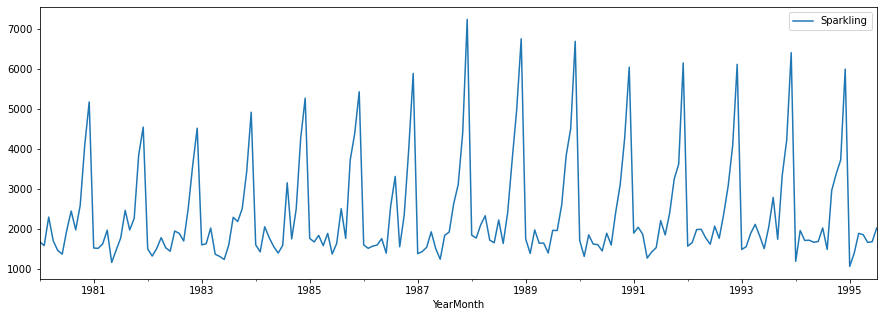

In [217]:
df.plot()

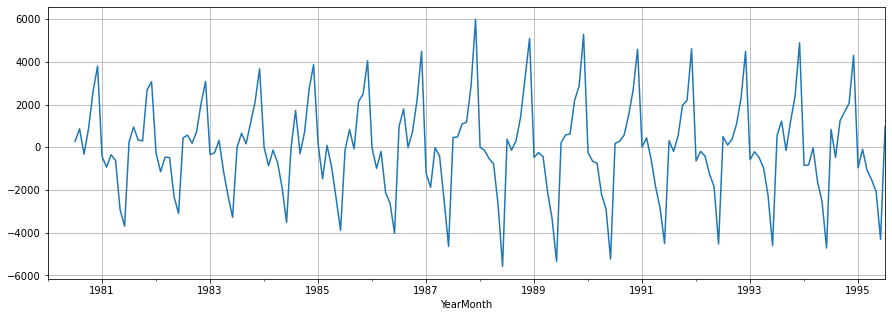

In [218]:
(df['Sparkling'].diff(6)).plot()
plt.grid();

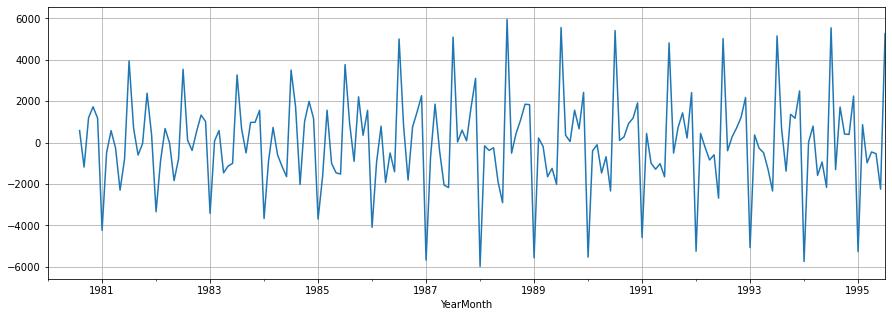

In [221]:
(df['Sparkling'].diff(6).diff()).plot()
plt.grid();

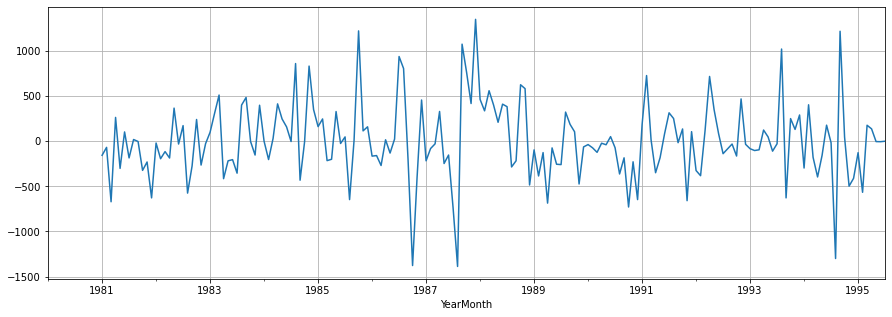

In [219]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

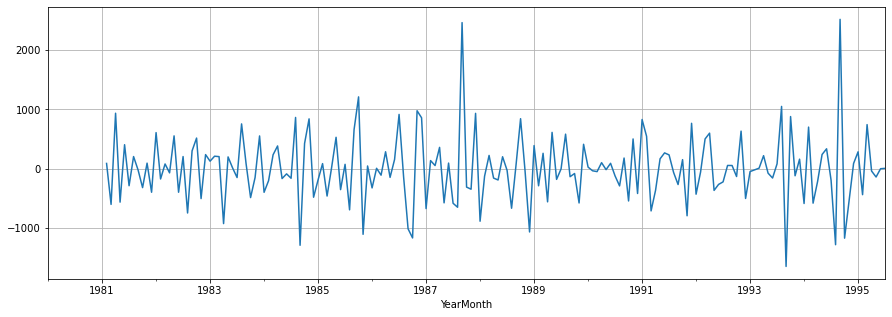

In [220]:
(df['Sparkling'].diff(12).diff()).plot()
plt.grid();

Here we can see that with difference of 6 the non-stationarity in data is gone. 

We will go with difference of 6

In [233]:
#checking stationarity of training data
test_stationarity((train['Sparkling'].diff(6).dropna()))

Results of Dickey-Fuller Test:
Test Statistic                -8.364877e+00
p-value                        2.760154e-13
#Lags Used                     6.000000e+00
Number of Observations Used    1.200000e+02
Critical Value (1%)           -3.486056e+00
Critical Value (5%)           -2.885943e+00
Critical Value (10%)          -2.579785e+00
dtype: float64 



In [235]:
#checking stationarity of training data
test_stationarity((train['Sparkling'].diff(12).dropna()))

Results of Dickey-Fuller Test:
Test Statistic                -8.698578e+00
p-value                        3.864403e-14
#Lags Used                     0.000000e+00
Number of Observations Used    1.200000e+02
Critical Value (1%)           -3.486056e+00
Critical Value (5%)           -2.885943e+00
Critical Value (10%)          -2.579785e+00
dtype: float64 



Here, alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(1) and q(1) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. 

In [237]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  133
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -820.586
Date:                                   Wed, 08 Sep 2021   AIC                           1651.172
Time:                                           01:18:00   BIC                           1664.536
Sample:                                                0   HQIC                          1656.590
                                                   - 133                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -1.0095      0.015    -67.870      0.000    

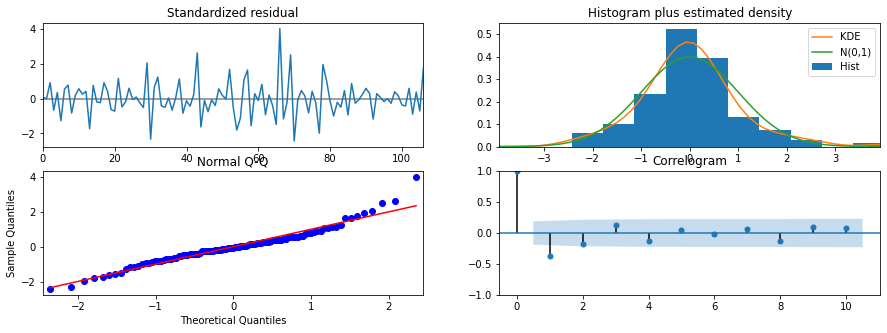

In [238]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

### evaluating the model and prediction

In [239]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [240]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

552.9297510339725


In [241]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_Manual(0,1,0)(1,1,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA_Auto(2,1,2)",1453.602798
"SARIMA_Auto_Season6(0,1,2)(2,0,2,6)",494.181411
"SARIMA_Auto_Season12(1,1,2)(1,0,2,12)",455.843085
"ARIMA_Manual(0,1,0)",1365.112507
"SARIMA_Manual(0,1,0)(1,1,3,6)",552.929751


In [242]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  133
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 12)   Log Likelihood               -1324.541
Date:                                    Wed, 08 Sep 2021   AIC                           2659.083
Time:                                            01:20:46   BIC                           2671.177
Sample:                                                 0   HQIC                          2663.942
                                                    - 133                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3879        nan        nan       

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning:

invalid value encountered in sqrt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning:

divide by zero encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2885: RuntimeWarning:

divide by zero encountered in true_divide



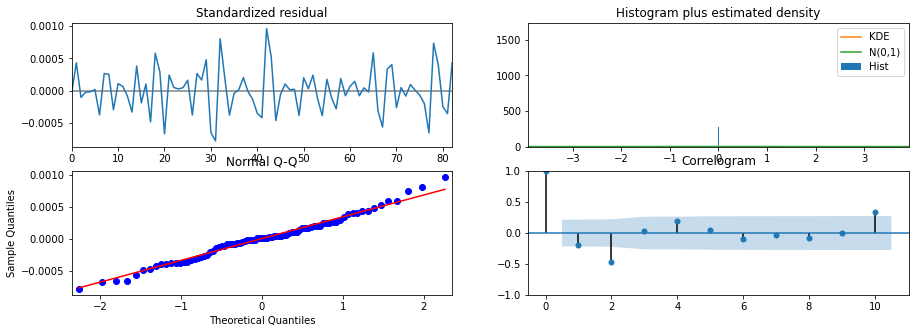

In [243]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [244]:
#evalate model and predict

predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [245]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

2808.4179945616665


In [246]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_Manual_12(0,1,0)(1,1,3,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA_Auto(2,1,2)",1453.602798
"SARIMA_Auto_Season6(0,1,2)(2,0,2,6)",494.181411
"SARIMA_Auto_Season12(1,1,2)(1,0,2,12)",455.843085
"ARIMA_Manual(0,1,0)",1365.112507
"SARIMA_Manual(0,1,0)(1,1,3,6)",552.929751
"SARIMA_Manual_12(0,1,0)(1,1,3,12)",2808.417995


In [248]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['RMSE'])

Sorted by RMSE values on the Test Data: 



,RMSE
"SARIMA_Auto_Season12(1,1,2)(1,0,2,12)",455.843085
"SARIMA_Auto_Season6(0,1,2)(2,0,2,6)",494.181411
"SARIMA_Manual(0,1,0)(1,1,3,6)",552.929751
"ARIMA_Manual(0,1,0)",1365.112507
"ARIMA_Auto(2,1,2)",1453.602798
"SARIMA_Manual_12(0,1,0)(1,1,3,12)",2808.417995


## Building optimum model on complete Data

In [250]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.433
Date:                            Wed, 08 Sep 2021   AIC                           2360.867
Time:                                    01:28:51   BIC                           2382.349
Sample:                                01-01-1980   HQIC                          2369.590
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6609      0.243     -2.720      0.007      -1.137      -0.185
ma.L1         -0.1803      0.220   

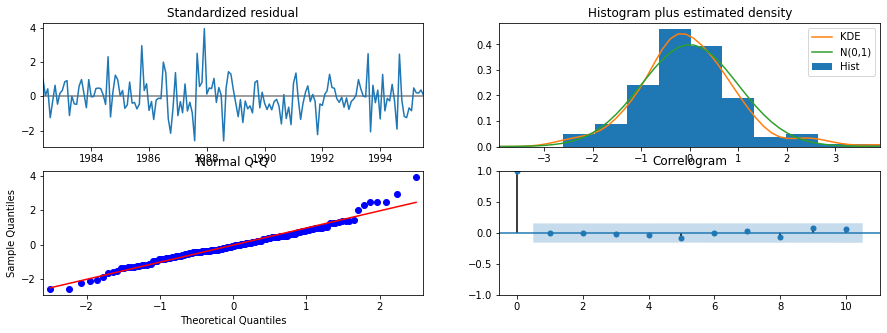

In [251]:
results_full_data_model.plot_diagnostics();

### Evaluate the model on the whole and predict 12 months into the future

In [252]:
predicted_automated_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [253]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 536.9636071967118


In [254]:
pred_full_automated_SARIMA_date = predicted_automated_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-1',end='1996-8-1', freq='M'))

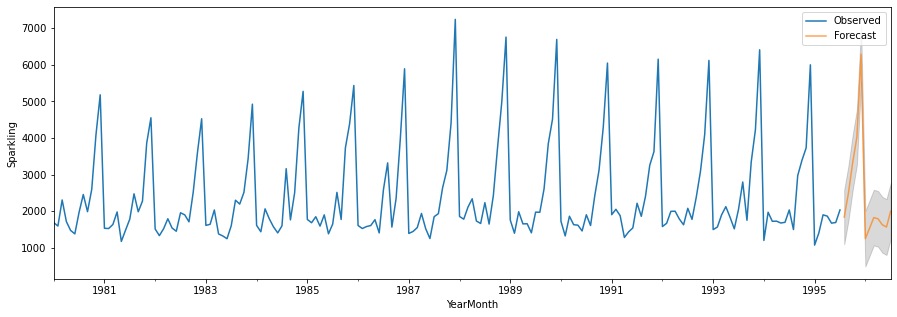

In [256]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_automated_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_automated_SARIMA_date.index, pred_full_automated_SARIMA_date['mean_ci_lower'], 
                  pred_full_automated_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()